In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)
library(kmed)
library(plotly)


Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
file = "../../../../../../dataframes/enoe/SDEMT/df_encoding.csv"


In [3]:
#cargar
df <- read.csv(file = file)
data <- df
head(data)

eda,anios_esc,hrsocup,ingocup,ing_x_hrs,est_20,est_30,est_40,t_loc_1,t_loc_2,⋯,mh_fil2_1,mh_fil2_2,mh_fil2_3,mh_col_0,mh_col_1,mh_col_2,mh_col_3,mh_col_7,sec_ins_0,sec_ins_8
0.6983141,0.7038438,0.2707028,0.5148457,0.4181089,0,1,0,1,0,⋯,0,0,0,1,0,0,0,0,1,0
0.6799321,0.7313834,0.2614252,0.5642736,0.5097726,1,0,0,1,0,⋯,0,0,0,1,0,0,0,0,1,0
0.5769558,0.6662193,0.3394665,0.5453784,0.4350734,0,1,0,1,0,⋯,0,0,0,1,0,0,0,0,1,0
0.5786007,0.5834670,0.2560204,0.4021909,0.4714502,1,0,0,0,1,⋯,0,0,0,1,0,0,0,0,1,0
0.6431648,0.6808086,0.2491112,0.3014189,0.2361188,1,0,0,1,0,⋯,0,0,0,1,0,0,0,0,1,0
0.7319174,0.7206250,0.2869156,0.3254579,0.2639982,0,1,0,1,0,⋯,0,0,0,1,0,0,0,0,1,0


In [4]:
ncol(data)

[1] 220

In [5]:
data <- as.matrix(data)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

In [6]:
max(dunn_kmeans)

[1] 0.5381624

Saving 7 x 7 in image


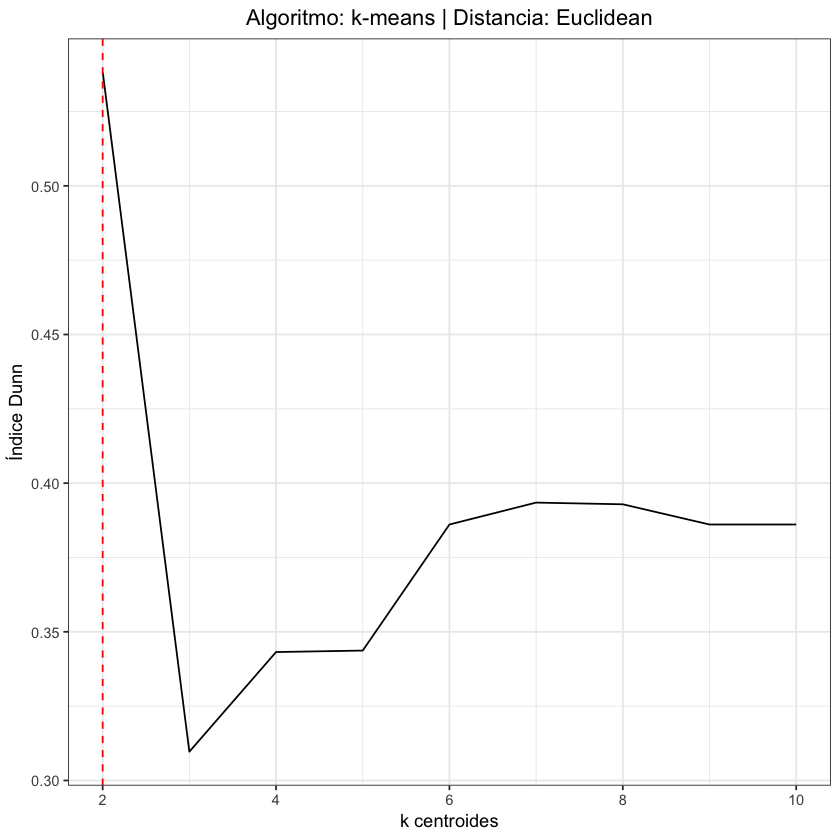

In [8]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'Algoritmo: k-means | Distancia: Euclidean', 
                                   xlab = 'k centroides', 
                                   ylab = 'Índice Dunn')


plot_dunn_kmeans  + 
theme_bw() + #ylim(0,0.3) + 
geom_vline(xintercept = range_k[which.max(dunn_kmeans)], linetype = 2, color='red') +
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/enoe/SDEMT/dunn_euclidean_encoding.png", dpi = 300)
    

In [9]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

Saving 7 x 7 in image


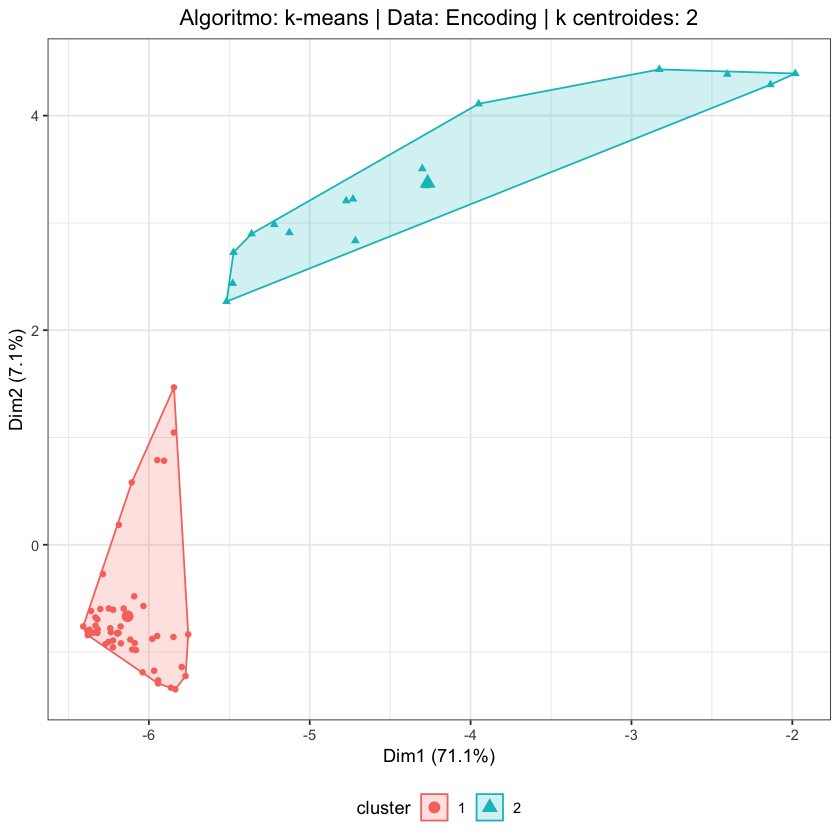

In [11]:
plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Algoritmo: k-means | Data: Encoding | k centroides:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans + 
theme_bw() +
theme(legend.position = 'bottom') + 
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/enoe/SDEMT/kmeans_euclidean_encoding.png", 
       dpi = 300)

In [12]:
dunn_kmeans

[1] 0.5381624 0.3096764 0.3431937 0.3436971 0.3860905 0.3934658 0.3928895
[8] 0.3860905 0.3860905

In [27]:
file = '../../../../../../dataframes/enigh/HOGARES/df_encoding_dunn.csv'


In [28]:
write.csv(dunn_kmeans, 
          file = file,
          row.names=T)


In [15]:
file = '../../../../../../dataframes/enoe/SDEMT/df_encoding_cluster.csv'


In [16]:
write.csv(kmeans$cluster, 
          file = file,
          row.names=F)
